# Mobile Prices

## Situation:

TeleCom Division  is one of the most robust distribution companies in Guatemala, with a specific emphasis on the western highlands of the country.

They plan to buy mobile phones from Amazon and ship them from the US to Guatemala. As they've been in the market for a while, every time they purchase new inventory, they need to do a cost analysis to ensure they make at least 30% profit on each phone sold.

Now, they need a more automated solution that can predict phone prices in advance. This will help them provide price quotes to their biggest clients ahead of competitors and stay one step ahead in the market.

## Goal:

Build a machine learning model that can predict the most accurate mobile phone prices possible.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rkiattisak/mobile-phone-price")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\104662728\.cache\kagglehub\datasets\rkiattisak\mobile-phone-price\versions\2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\104662728\.cache\kagglehub\datasets\rkiattisak\mobile-phone-price\versions\2\Mobile phone price.csv")
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [4]:
df.tail()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429
406,Samsung,Galaxy S10 Lite,128,6,6.7,48+12+5,4500,649


In [5]:
df.shape

(407, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [7]:
df.isna().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

## Data Cleaning

In [8]:
df[df.duplicated()]

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
45,Apple,iPhone 12 Mini,64 GB,4 GB,5.4,12 + 12,2227,699
61,Xiaomi,Poco M3 Pro 5G,64 GB,4 GB,6.5,48 + 2 + 2,5000,199
132,Nokia,XR20,128GB,6GB,6.67,48MP + 13MP,4630,$549
170,Motorola,Moto G Stylus 5G,128GB,5GB,6.8,48MP + 8MP + 5MP,5000,$399
195,Oppo,A74 5G,128GB,6GB,6.5,48MP + 2MP + 2MP,5000,$299
221,Vivo,Y12s,32GB,3GB,6.51,13MP + 2MP,5000,$149
229,Xiaomi,Redmi Note 10 Pro Max,128GB,8GB,6.67,108MP + 8MP + 5MP + 2MP,5020,$329
240,Nokia,C20 Plus,32GB,3GB,6.5,8MP + 2MP,4950,$99
246,Xiaomi,Poco X3 Pro,128GB,6GB,6.67,48MP + 8MP + 2MP + 2MP,5160,$249
248,Oppo,A16,32GB,3GB,6.52,13MP + 2MP + 2MP,5000,$149


In [9]:
df['Storage']=df['Storage '].str.replace('GB','').astype(int)
df['RAM']=df['RAM '].str.replace('GB','').astype(int)

df=df.drop('Storage ',axis=1)
df=df.drop('RAM ',axis=1)

In [10]:
df['Screen Size (inches)'].value_counts()

Screen Size (inches)
6.5               108
6.67               30
6.4                26
6.7                25
6.55               21
6.43               21
6.51               19
6.1                16
6.53               16
6.58               14
6.6                14
6.52               14
6.8                 9
6.44                8
6.39                7
4.7                 5
6.81                5
6                   4
6.3                 4
6.82                4
6.2                 4
6.78                4
5.4                 3
6.62                3
6.9                 3
4.5                 2
5.5                 2
6.49                2
6.72                2
7.6 (unfolded)      1
6.15                1
6.47                1
5.7                 1
6.8 + 3.9           1
6.76                1
6.35                1
6.22                1
5.99                1
5.9                 1
6.56                1
6.57                1
Name: count, dtype: int64

In [11]:
df['Screen Size (inches)']=df['Screen Size (inches)'].str.replace(' (unfolded)','')
df['Screen Size (inches)']=df['Screen Size (inches)'].str.replace('6.8 + 3.9','10.7').str.strip()
df['Screen Size (inches)']=df['Screen Size (inches)'].astype(float)

In [12]:
df['Camera (MP)'].value_counts()

Camera (MP)
13MP + 2MP + 2MP          29
48MP + 8MP + 2MP + 2MP    16
48+8+2+2                  13
13MP + 2MP                11
64MP + 8MP + 2MP          11
                          ..
13MP + 5MP + 2MP + 2MP     1
8MP                        1
48MP + 8MP + 5MP + 2MP     1
13MP                       1
48+13+8+2                  1
Name: count, Length: 143, dtype: int64

In [13]:
df['Camera (MP)'] = df['Camera (MP)'].str.lower().str.strip()
df['Camera (MP)'] = df['Camera (MP)'].str.replace('mp','')
df['Camera (MP)'] = df['Camera (MP)'].str.replace('tof','')
df['Camera (MP)'] = df['Camera (MP)'].str.replace('3d','')
df['Camera (MP)'] = df['Camera (MP)'].str.replace(' + ', '+')

In [14]:
pixel = df['Camera (MP)'].str.split('+',expand=True).fillna(0)
pixel.head()

,0,1,2,3
0,12,12,12,0
1,108,10,10,12
2,48,50,8,2
3,64,8,5,2
4,50,12.2,0,0


In [15]:
pixel[3].loc[292]=0
pixel[3].loc[312]=0
pixel[3].loc[330]=0
pixel[3].loc[342]=0
pixel[3].loc[361]=0
pixel[3].loc[367]=0
pixel[3].loc[376]=0

C:\Users\104662728\AppData\Local\Temp\ipykernel_24136\2193880792.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pixel[3].loc[292]=0
C:\Users\104662728\AppData\Local\Temp\ipykernel_24136\2193880792.py:2: FutureWarning: ChainedAssignmentE

In [16]:
pixel[pixel[3]==""]

,0,1,2,3


In [17]:
pixel[0]=pixel[0].astype(float)
pixel[1]=pixel[1].astype(float)
pixel[2]=pixel[2].astype(float)
pixel[3]=pixel[3].astype(float)

In [18]:
pixel.sum()

0    17631.0
1     3714.2
2     1482.0
3      400.3
dtype: float64

In [19]:
pixel['total_pixels'] =pixel[0] +pixel[1] +pixel[2] +pixel[3]
pixel = pixel.drop([0,1,2,3],axis=1)
pixel.head()

,total_pixels
0,36.0
1,140.0
2,108.0
3,79.0
4,62.2


In [20]:
df.head()

,Brand,Model,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Storage,RAM
0,Apple,iPhone 13 Pro,6.10,12+12+12,3095,999,128,6
1,Samsung,Galaxy S21 Ultra,6.80,108+10+10+12,5000,1199,256,12
2,OnePlus,9 Pro,6.70,48+50+8+2,4500,899,128,8
3,Xiaomi,Redmi Note 10 Pro,6.67,64+8+5+2,5020,279,128,6
4,Google,Pixel 6,6.40,50+12.2,4614,799,128,8


In [21]:
#Joining total_pixels col
df=df.join(pixel)
df.head()

,Brand,Model,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Storage,RAM,total_pixels
0,Apple,iPhone 13 Pro,6.10,12+12+12,3095,999,128,6,36.0
1,Samsung,Galaxy S21 Ultra,6.80,108+10+10+12,5000,1199,256,12,140.0
2,OnePlus,9 Pro,6.70,48+50+8+2,4500,899,128,8,108.0
3,Xiaomi,Redmi Note 10 Pro,6.67,64+8+5+2,5020,279,128,6,79.0
4,Google,Pixel 6,6.40,50+12.2,4614,799,128,8,62.2


In [22]:
df.drop('Camera (MP)',axis=1,inplace=True)
df.head()

,Brand,Model,Screen Size (inches),Battery Capacity (mAh),Price ($),Storage,RAM,total_pixels
0,Apple,iPhone 13 Pro,6.10,3095,999,128,6,36.0
1,Samsung,Galaxy S21 Ultra,6.80,5000,1199,256,12,140.0
2,OnePlus,9 Pro,6.70,4500,899,128,8,108.0
3,Xiaomi,Redmi Note 10 Pro,6.67,5020,279,128,6,79.0
4,Google,Pixel 6,6.40,4614,799,128,8,62.2


In [23]:
df['Price ($)']=df['Price ($)'].str.replace('$','').str.strip()
df['Price ($)']=df['Price ($)'].str.replace(',','').astype(float)

In [24]:
df['Price ($)'].sum()

166184.0

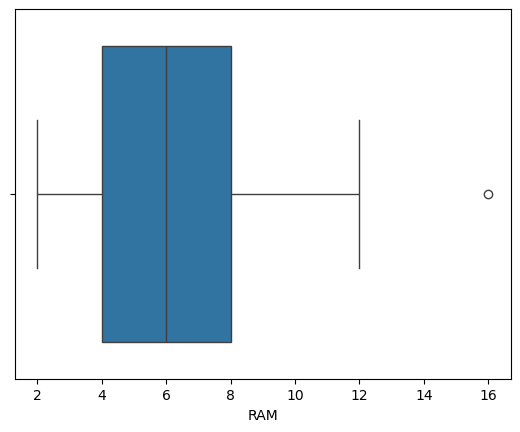

In [25]:
sns.boxplot(x=df['RAM']);

In [26]:
df[df['RAM']>14]

,Brand,Model,Screen Size (inches),Battery Capacity (mAh),Price ($),Storage,RAM,total_pixels
367,Samsung,Galaxy S20 Ultra 5G,6.9,5000,1399.0,512,16,168.0


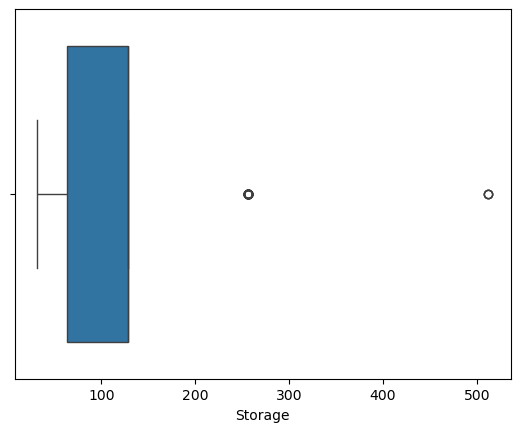

In [27]:
sns.boxplot(x=df['Storage']);

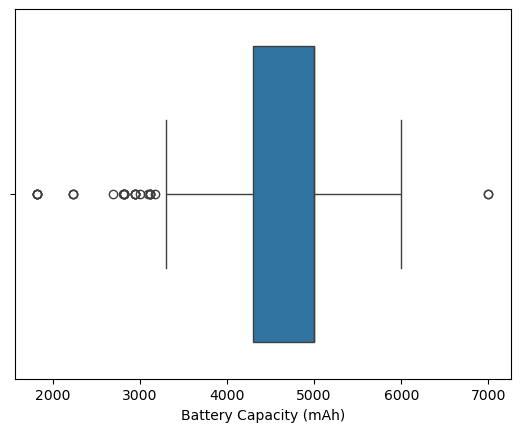

In [28]:
sns.boxplot(x=df['Battery Capacity (mAh)']);

In [29]:
df[df['Battery Capacity (mAh)']<3000]

,Brand,Model,Screen Size (inches),Battery Capacity (mAh),Price ($),Storage,RAM,total_pixels
5,Apple,iPhone 13,6.1,2815,799.0,128,4,24.0
13,Apple,iPhone 12 Mini,5.4,2227,699.0,64,4,24.0
32,Apple,iPhone SE (2nd Gen),4.7,1821,399.0,64,3,12.0
39,Apple,iPhone XR,6.1,2942,499.0,64,3,12.0
45,Apple,iPhone 12 Mini,5.4,2227,699.0,64,4,24.0
62,Apple,iPhone SE (2020),4.7,1821,399.0,64,3,12.0
68,Apple,iPhone XR,6.1,2942,499.0,64,3,24.0
77,Apple,iPhone 13,6.1,2815,799.0,128,4,24.0
289,Apple,iPhone SE (2020),4.7,1821,399.0,64,3,12.0
305,Apple,iPhone 13,6.1,2815,799.0,128,6,36.0


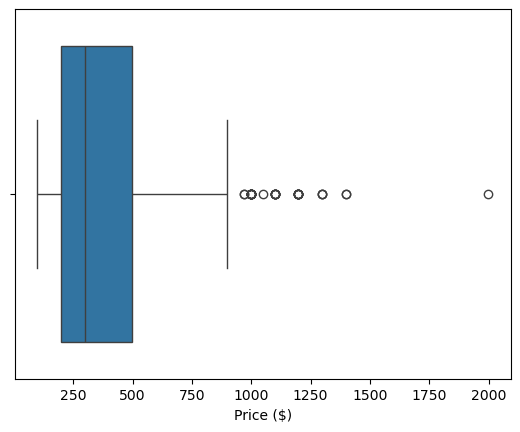

In [30]:
sns.boxplot(x=df['Price ($)']);

In [31]:
df[df['Price ($)']>1500]

,Brand,Model,Screen Size (inches),Battery Capacity (mAh),Price ($),Storage,RAM,total_pixels
373,Samsung,Galaxy Z Fold2 5G,7.6,4500,1999.0,256,12,36.0


In [32]:
df[df['Price ($)']<250]

,Brand,Model,Screen Size (inches),Battery Capacity (mAh),Price ($),Storage,RAM,total_pixels
7,Xiaomi,Poco X3 Pro,6.67,5160,249.0,128,6,60.0
17,Vivo,Y20s (G),6.51,5000,199.0,128,6,54.0
20,Xiaomi,Redmi 10 Prime,6.50,6000,179.0,128,6,62.0
22,Realme,Narzo 50 Pro 5G,6.50,5000,249.0,128,6,100.0
26,Samsung,Galaxy A03s,6.50,5000,139.0,32,3,17.0
...,...,...,...,...,...,...,...,...
380,Xiaomi,Redmi 9C,6.53,5000,119.0,64,3,17.0
383,Huawei,Y7p,6.39,4000,199.0,64,4,58.0
389,Xiaomi,Redmi 9T,6.53,6000,199.0,128,4,60.0
394,Motorola,Moto G8 Power,6.40,5000,199.0,64,4,34.0


## Exploratory Data Analysis

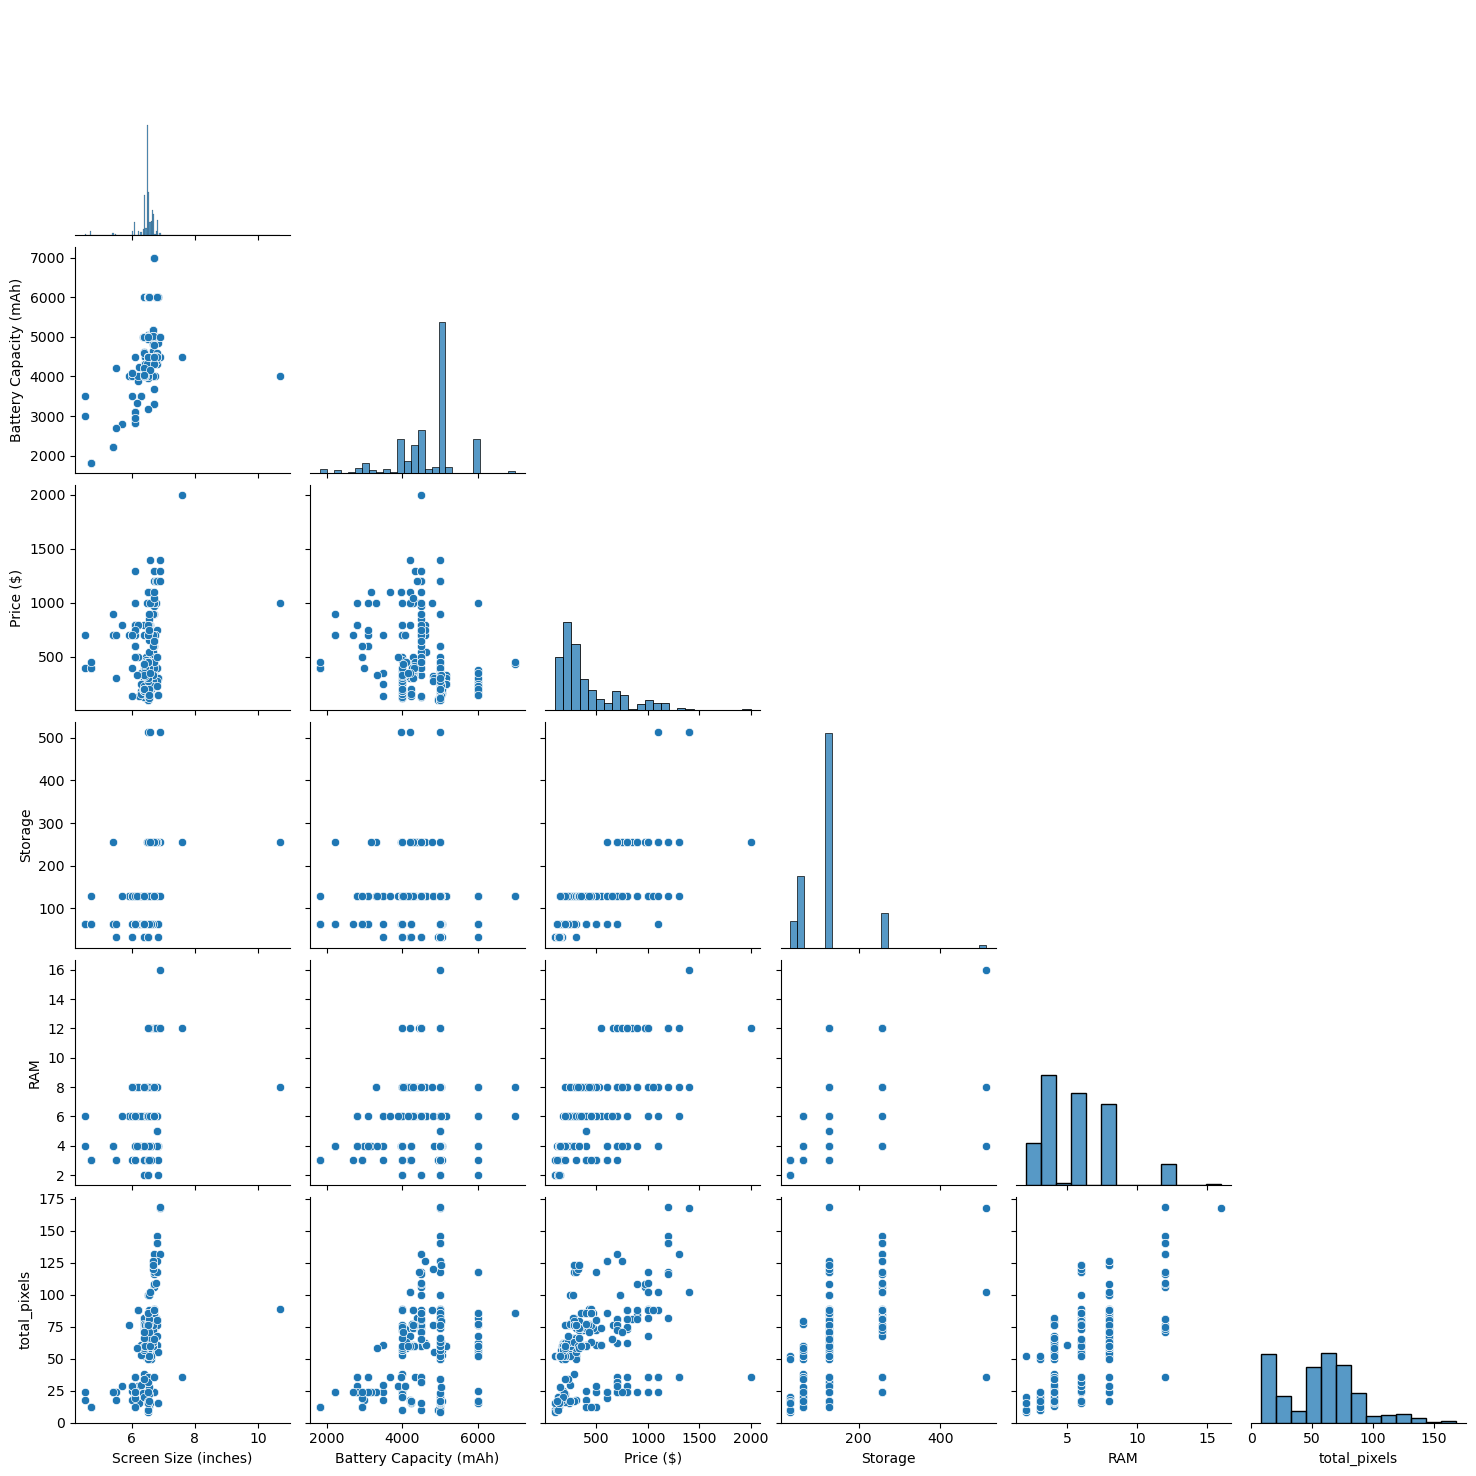

In [33]:
sns.pairplot(df,corner=True);

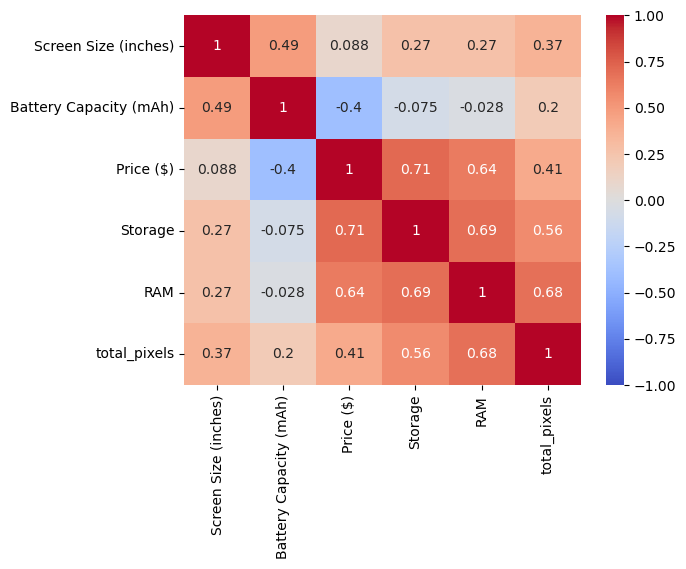

In [34]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',vmax=1,vmin=-1);

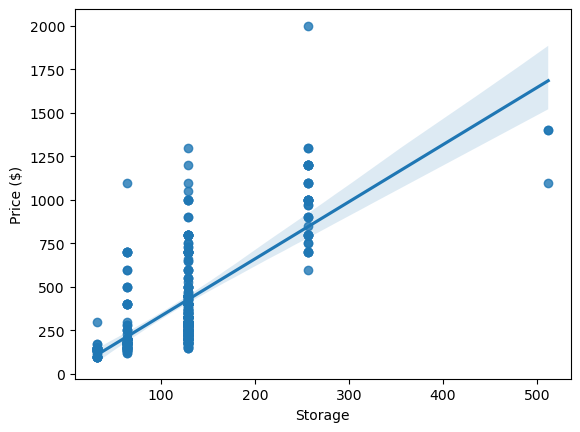

In [35]:
sns.regplot(data=df,x='Storage',y='Price ($)');

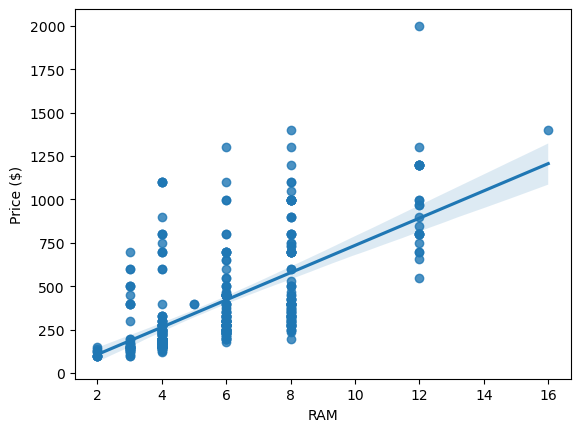

In [36]:
sns.regplot(data=df,x='RAM',y='Price ($)');

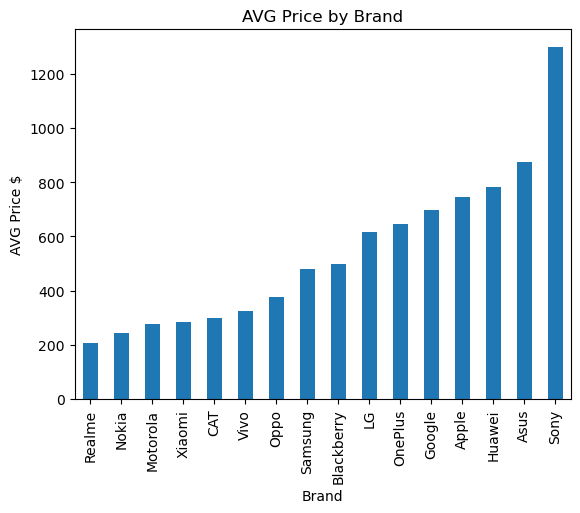

In [37]:
df.groupby('Brand')['Price ($)'].mean().sort_values().plot(kind='bar');
plt.title('AVG Price by Brand')
plt.ylabel('AVG Price $');

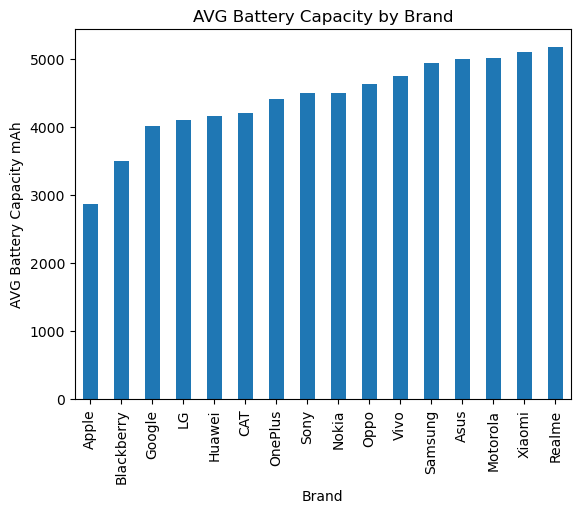

In [38]:
df.groupby('Brand')['Battery Capacity (mAh)'].mean().sort_values().plot(kind='bar');
plt.title('AVG Battery Capacity by Brand')
plt.ylabel('AVG Battery Capacity mAh');

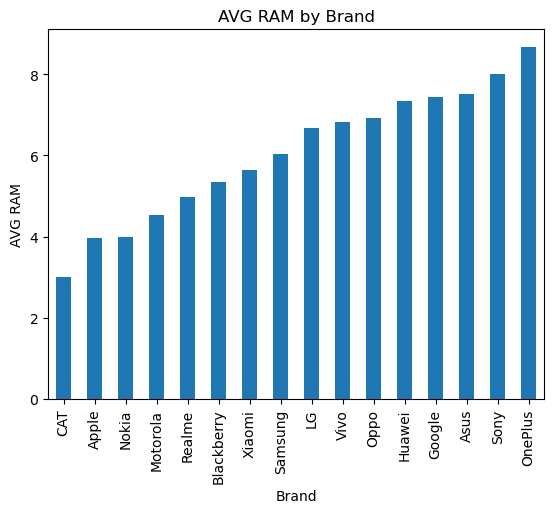

In [39]:
df.groupby('Brand')['RAM'].mean().sort_values().plot(kind='bar');
plt.title('AVG RAM by Brand')
plt.ylabel('AVG RAM');

### we all know no Matter what Apple does there will always be people who purchased their products even if Battery,RAM and Storage are not the best and are in top 5 og highest AVG Price
###### I got an iphone 11 BTW hahhahaha lol xd but thinking to get a samsung and keep both 

# Preparing for Modeling

In [40]:
df.head()

,Brand,Model,Screen Size (inches),Battery Capacity (mAh),Price ($),Storage,RAM,total_pixels
0,Apple,iPhone 13 Pro,6.10,3095,999.0,128,6,36.0
1,Samsung,Galaxy S21 Ultra,6.80,5000,1199.0,256,12,140.0
2,OnePlus,9 Pro,6.70,4500,899.0,128,8,108.0
3,Xiaomi,Redmi Note 10 Pro,6.67,5020,279.0,128,6,79.0
4,Google,Pixel 6,6.40,4614,799.0,128,8,62.2


In [41]:
# Creating a copy of df just in case
df_names= df.copy()
df = df.copy()
df.head()

,Brand,Model,Screen Size (inches),Battery Capacity (mAh),Price ($),Storage,RAM,total_pixels
0,Apple,iPhone 13 Pro,6.10,3095,999.0,128,6,36.0
1,Samsung,Galaxy S21 Ultra,6.80,5000,1199.0,256,12,140.0
2,OnePlus,9 Pro,6.70,4500,899.0,128,8,108.0
3,Xiaomi,Redmi Note 10 Pro,6.67,5020,279.0,128,6,79.0
4,Google,Pixel 6,6.40,4614,799.0,128,8,62.2


In [42]:
# Binnig
df['Brand'].value_counts()

Brand
Samsung       79
Xiaomi        67
Oppo          56
Realme        43
Vivo          35
Apple         30
Nokia         28
Motorola      23
OnePlus       15
Huawei        12
Google         7
Asus           4
LG             3
Blackberry     3
Sony           1
CAT            1
Name: count, dtype: int64

In [43]:
# Initially I classified by top brands but then noticed dataset was wider and we don't want that so i switched to country made of 
brand_country = {
    'Samsung': 'South Korea',
    'Xiaomi': 'China',
    'Oppo': 'China',
    'Realme': 'China',
    'Vivo': 'China',
    'Apple': 'USA',
    'Nokia': 'Finland',
    'Motorola': 'USA',
    'OnePlus': 'China',
    'Huawei': 'China',
    'Google': 'USA',
    'Asus': 'Taiwan',
    'LG': 'South Korea',
    'Blackberry': 'Canada',
    'Sony': 'Japan',
    'CAT': 'USA'
}

df['Brand']=df['Brand'].map(brand_country)

In [44]:
df['Model'].nunique()

239

In [45]:
df['Model'].to_list()

['iPhone 13 Pro',
 'Galaxy S21 Ultra',
 '9 Pro',
 'Redmi Note 10 Pro',
 'Pixel 6',
 'iPhone 13',
 'Galaxy Z Flip3',
 'Poco X3 Pro',
 'Reno6 Pro+ 5G',
 'X70 Pro+',
 'Nord CE 5G',
 'Galaxy A52s 5G',
 'GT Neo2',
 'iPhone 12 Mini',
 'Find X3 Pro',
 'Mi 11 Lite 5G NE',
 'Galaxy S21',
 'Y20s (G)',
 '8s 5G',
 'A94',
 'Redmi 10 Prime',
 'Galaxy A22 5G',
 'Narzo 50 Pro 5G',
 '9',
 'Redmi Note 10 Pro Max',
 'iPhone 11',
 'Galaxy A03s',
 'A74 5G',
 'Y12s (2021)',
 '9i',
 'Galaxy M52 5G',
 'Redmi 10',
 'iPhone SE (2nd Gen)',
 'A53s',
 'Y33s',
 'C25s',
 'Galaxy A22 4G',
 'Nord 2 5G',
 'Poco M3 Pro 5G',
 'iPhone XR',
 'A16',
 'C21Y',
 'Galaxy F22',
 'F19 Pro+ 5G',
 'Mi 11X',
 'iPhone 12 Mini',
 'V21e',
 '8 5G',
 'Galaxy M12',
 'A16s',
 'Redmi 9 Power',
 'iPhone 11 Pro Max',
 'Y20G',
 'Narzo 50i',
 'Galaxy A52s 5G',
 'A54',
 'Redmi 9T',
 'iPhone 13 Pro Max',
 'Y33',
 'Galaxy A72',
 'Reno6 Pro 5G',
 'Poco M3 Pro 5G',
 'iPhone SE (2020)',
 'Y53s',
 '7i',
 'Galaxy A52 5G',
 'F19 Pro',
 'Redmi Note 10S',

### Since this list is huge idea here is to reduce the number of categories so I got the idea of classifying these models by Gama, High, Medium and Low
### I will ask ChatpGPT to create a Python library to do this, i know could built a function for that but wanned to be transparent and honest with you fulks yeah sometimes i use ChatGPT and google


* Little trcik copy the list above on excel and pass it on on batches of 60 for example so chatGPT does not cut off results

In [46]:
model_dict = {
    'iPhone 13 Pro': 'High',
    'Galaxy S21 Ultra': 'High',
    '9 Pro': 'Medium',
    'Redmi Note 10 Pro': 'Medium',
    'Pixel 6': 'High',
    'iPhone 13': 'High',
    'Galaxy Z Flip3': 'High',
    'Poco X3 Pro': 'Medium',
    'Reno6 Pro+ 5G': 'Medium',
    'X70 Pro+': 'High',
    'Nord CE 5G': 'Medium',
    'Galaxy A52s 5G': 'Medium',
    'GT Neo2': 'Medium',
    'iPhone 12 Mini': 'High',
    'Find X3 Pro': 'High',
    'Mi 11 Lite 5G NE': 'Medium',
    'Galaxy S21': 'High',
    'Y20s (G)': 'Low',
    '8s 5G': 'Low',
    'A94': 'Medium',


     'Redmi 10 Prime': 'Medium',
    'Galaxy A22 5G': 'Medium',
    'Narzo 50 Pro 5G': 'Medium',
    '9': 'Low',
    'Redmi Note 10 Pro Max': 'Medium',
    'iPhone 11': 'High',
    'Galaxy A03s': 'Low',
    'A74 5G': 'Medium',
    'Y12s (2021)': 'Low',
    '9i': 'Low',
    'Galaxy M52 5G': 'Medium',
    'Redmi 10': 'Low',
    'iPhone SE (2nd Gen)': 'High',
    'A53s': 'Low',
    'Y33s': 'Low',
    'C25s': 'Low',
    'Galaxy A22 4G': 'Low',
    'Nord 2 5G': 'Medium',
    'Poco M3 Pro 5G': 'Medium',
    'iPhone XR': 'High',
    'A16': 'Low',
    'C21Y': 'Low',
    'Galaxy F22': 'Low',
    'F19 Pro+ 5G': 'Medium',
    'Mi 11X': 'High',
    'iPhone 12 Mini': 'High',
    'V21e': 'Low',
    '8 5G': 'Low',
    'Galaxy M12': 'Low',
    'A16s': 'Low',
    'Redmi 9 Power': 'Low',
    'iPhone 11 Pro Max': 'High',
    'Y20G': 'Low',
    'Narzo 50i': 'Low',
    'Galaxy A52s 5G': 'Medium',
    'A54': 'Low',
    'Redmi 9T': 'Low',
    'iPhone 13 Pro Max': 'High',

     'Y33': 'Low',
    'Galaxy A72': 'Medium',
    'Reno6 Pro 5G': 'Medium',
    'Poco M3 Pro 5G': 'Medium',
    'iPhone SE (2020)': 'High',
    'Y53s': 'Low',
    '7i': 'Low',
    'Galaxy A52 5G': 'Medium',
    'F19 Pro': 'Medium',
    'Redmi Note 10S': 'Low',
    'iPhone XR': 'High',
    'Y21s': 'Low',
    'C25s': 'Low',
    'Galaxy A22 5G': 'Low',
    'A94': 'Low',
    'Mi 11 Lite 5G': 'High',
    'iPhone 11': 'High',
    'X60 Pro': 'High',
    'Narzo 50A': 'Low',
    'iPhone 13': 'High',
    'Galaxy S21': 'High',
    'Nord 2': 'Medium',
    'Pixel 6': 'High',
    'Poco X4 Pro': 'Medium',
    'GT Master Edition': 'Medium',
    'X70 Pro+': 'High',
    'Reno6 Pro+': 'Medium',
    'Edge 20 Pro': 'Medium',
    'XR20': 'Low',
    'Xperia 5 III': 'Medium',
    'Wing': 'Low',
    'Zenfone 8 Flip': 'Medium',
    'KEY2 LE': 'Low',
    'Galaxy A72': 'Medium',
    'Redmi Note 10 Pro Max': 'Medium',
    'Narzo 50 Pro 5G': 'Medium',
    'F19 Pro+': 'Medium',
    'Y33s': 'Low',

     'Moto G60': 'Low',
    '5.4': 'Low',
    'K92 5G': 'Low',
    'Zenfone 8': 'Medium',
    'KEY2': 'Low',
    'S42': 'Low',
    'Galaxy Z Flip 3': 'High',
    '9 Pro': 'Medium',
    'Mi 11 Ultra': 'High',
    'A16': 'Low',
    'Y12A': 'Low',
    'C20 Plus': 'Low',
    'Galaxy S20 FE 5G': 'High',
    'Moto E7i Power': 'Low',
    'Poco M3 Pro 5G': 'Medium',
    'C21Y': 'Low',
    'ROG Phone 5': 'High',
    'Velvet 5G': 'Medium',
    'Evolve': 'Low',
    'Reno 6 Pro+': 'Medium',
    'Galaxy A03s': 'Low',
    'Redmi 10 Prime': 'Low',
    'Moto G50': 'Low',
    'Narzo 50A': 'Low',
    'G20': 'Low',
    'Galaxy M32': 'Low',
    'Y20G': 'Low',
    'Zenfone 8 Flip': 'Medium',
    'A54': 'Medium',
    'Galaxy F22': 'Low',
    'Mi 11 Lite 5G': 'High',
    '8i': 'Low',
    'C30': 'Low',
    'Galaxy A32': 'Low',
    'Redmi Note 10 Pro Max': 'Medium',
    'C21Y': 'Low',
    'XR20': 'Low',
    'Galaxy A52s 5G': 'Medium',

     'Y33s': 'Low',
    'A16s': 'Low',
    'Moto G Stylus 5G': 'Medium',
    'Poco M3 Pro 5G': 'Medium',
    'GT Neo2': 'High',
    'C20 Plus': 'Low',
    'Galaxy A21s': 'Low',
    'Y12s': 'Low',
    'F19s': 'Low',
    'Narzo 30 Pro 5G': 'Medium',
    'Galaxy A03s': 'Low',
    'Redmi 10 Prime': 'Low',
    'Moto G Pure': 'Low',
    'Reno6 Z 5G': 'Medium',
    'Galaxy S21 Ultra 5G': 'High',
    'Y53s': 'Low',
    '8i': 'Low',
    'G50': 'Low',
    'Redmi 9 Activ': 'Low',
    'A54s': 'Low',
    'Galaxy M22': 'Low',
    'Moto G Power 2022': 'Low',
    'Y21s': 'Low',
    'Poco X3 GT': 'Medium',
    'Galaxy F42 5G': 'Medium',
    'A16s': 'Low',
    'V21e': 'Low',
    'GT Master Edition': 'Medium',
    'Edge 20 Fusion': 'Medium',
    'Galaxy A21s': 'Low',
    'Redmi Note 10S': 'Medium',
    'A74 5G': 'Medium',
    'C21': 'Low',
    'Galaxy M52 5G': 'Medium',
    'V21 5G': 'Low',
    'Redmi Note 9 Pro Max': 'Medium',
    'Moto G Stylus 5G': 'Medium',
    'Reno6 Pro+ 5G': 'Medium',

    'Narzo 30 Pro 5G': 'Medium',
    'Galaxy A32': 'Low',
    'Poco X3 Pro': 'Medium',
    'C25s': 'Low',
    'Moto G Power 2021': 'Low',
    'Galaxy A52s 5G': 'Medium',
    'V21e 5G': 'Low',
    'A53s 5G': 'Medium',
    'GT Neo2': 'High',
    'Galaxy M32': 'Low',
    'Mi 11 Lite NE': 'Medium',
    'Moto G Stylus 2021': 'Low',
    'A54s 5G': 'Low',
    'Galaxy F41': 'Low',
    'Redmi Note 10 Pro': 'Medium',
    'Narzo 50A': 'Low',
    'A16s': 'Low',
    'Galaxy M52': 'Medium',
    'V21 5G': 'Low',
    'Moto G50s': 'Low',
    'Galaxy A13': 'Low',
    'Redmi 9 Activ': 'Low',
    '7i': 'Low',
    'A74 5G': 'Medium',
    'Galaxy A42 5G': 'Low',
    'Y33s': 'Low',
    'Moto G9 Power Lite': 'Low',
    'C21Y': 'Low',
    'Galaxy A22': 'Low',
    'Redmi Note 10S': 'Medium',
    'A74': 'Medium',
    'Galaxy A32': 'Low',
    'Y72 5G': 'Medium',
    'Moto G60': 'Medium',
    'Mi 10i': 'Medium',
    'Narzo 30 Pro': 'Medium',
    'Galaxy M62': 'Medium',
    'A53s': 'Medium',

    'Redmi 10 Prime': 'Low',
    'C25s': 'Low',
    'Galaxy A12': 'Low',
    'Poco X3 Pro': 'Medium',
    'Galaxy A03s': 'Low',
    'A15s': 'Low',
    'C11 2021': 'Low',
    'C30': 'Low',
    'Redmi 9i': 'Low',
    'Galaxy A22 5G': 'Low',
    'A53': 'Medium',
    'Y12s': 'Low',
    'Mi 11 Lite 5G': 'Medium',
    '7 5G': 'Medium',
    'Galaxy M31s': 'Medium',
    'A15': 'Low',
    'G10': 'Low',
    'Poco X3 GT': 'Medium',
    'C25': 'Low',
    'Redmi Note 10 Pro Max': 'Medium',
    'Galaxy A52 5G': 'Medium',
    'A94': 'Low',
    'Y33s': 'Low',
    'Narzo 50A': 'Low',
    'X20': 'Low',
    'Redmi 9 Power': 'Low',
    'Galaxy M12': 'Low',
    'A53s': 'Medium',
    'Y20s G': 'Low',
    'C21Y': 'Low',
    'C20 Plus': 'Low',
    'Redmi 10 Prime': 'Low',
    'Reno 6 Pro 5G': 'High',
    'Y31s': 'Low',
    '8 5G': 'Medium',
    'G20': 'Low',
    'Poco X3 Pro': 'Medium',
    'Galaxy A32 5G': 'Low',


     'A16': 'Low',
    'V21 5G': 'Medium',
    'C11 2021': 'Low',
    '5.4': 'Low',
    'Redmi Note 10': 'Medium',
    'Galaxy F41': 'Medium',
    'A54': 'Medium',
    'V20 SE': 'Low',
    '3.4': 'Low',
    'Redmi Note 9 Pro Max': 'Medium',
    'Galaxy M31s': 'Medium',
    'A54': 'Medium',
    'Y12s': 'Low',
    'C20': 'Low',
    '1.4': 'Low',
    'Redmi 9 Power': 'Low',
    'Galaxy A02s': 'Low',
    'A15s': 'Low',
    'Y51A': 'Low',
    'Narzo 20': 'Low',
    '5.3': 'Low',
    'Redmi Note 8': 'Low',
    'Galaxy M11': 'Low',
    'A54': 'Medium',
    'Y20s': 'Low',
    'C11': 'Low',
    '2.4': 'Low',
    'Redmi 9': 'Low',
    'Galaxy A11': 'Low',
    'A12': 'Low',
    'Y20G': 'Low',
    'C15': 'Low',
    '3.1 Plus': 'Low',
    'Redmi Note 7': 'Low',
    'Galaxy A12': 'Low',
    'A31': 'Medium',
    'Y15': 'Low',
    'Narzo 10A': 'Low',

    'Redmi 9T': 'Low',
    'Galaxy A30s': 'Low',
    'Galaxy Note 20 Ultra': 'High',
    'iPhone SE (2020)': 'Medium',
    'Poco X3 Pro': 'Medium',
    'Pixel 5': 'Medium',
    'Mate 40 Pro': 'High',
    'Nord N10 5G': 'Medium',
    'Reno 5 Pro 5G': 'Medium',
    'Galaxy A71': 'Medium',
    '8.3 5G': 'Medium',
    'iPhone 11 Pro Max': 'High',
    'Mi 11': 'High',
    'Moto G Power (2021)': 'Low',
    'Pixel 4a 5G': 'Medium',
    'Nova 8 Pro 5G': 'Medium',
    'Galaxy A52': 'Medium',
    '8T': 'Medium',
    'Redmi 9': 'Low',
    'iPhone 13': 'High',
    'A15s': 'Low',
    'G50 5G': 'Medium',
    'iPhone XR': 'High',
    'Galaxy S21 Ultra 5G': 'High',
    'Redmi Note 10 Pro': 'Medium',
    'Find X3 Neo 5G': 'Medium',
    'P40 Pro': 'High',
    '9 Pro': 'Medium',
    'Moto G Stylus (2021)': 'Low',
    'Pixel 4': 'Medium',
    'Galaxy A12': 'Low',
    '5.4': 'Low',
    'iPhone 12': 'High',
    'Redmi 10': 'Low',
    'A94 5G': 'Medium',
    'Nova 9 Pro 5G': 'Medium',
    'Galaxy S10 Lite': 'Medium',
    '8 Pro': 'Medium',

     '7.2': 'Low',
    'Mi 10T Pro': 'High',
    'iPhone 11': 'High',
    'F19 Pro+ 5G': 'Medium',
    'Moto G Power (2021)': 'Low',
    'Galaxy A71': 'Medium',
    'Mate 30 Pro 5G': 'High',
    'Poco X3 Pro': 'Medium',
    'Pixel 5': 'Medium',
    'iPhone SE (2020)': 'Medium',
    'Galaxy M51': 'Medium',
    'Reno4 Pro 5G': 'Medium',
    '3.4': 'Low',
    'Moto G9 Plus': 'Low',
    'iPhone XS Max': 'High',
    'Galaxy A32 5G': 'Medium',
    'Redmi Note 9S': 'Medium',
    'A92': 'Medium',
    'P30 Pro': 'High',
    'Galaxy S20 FE 5G': 'High',
    '7 Pro': 'Medium',
    '6.2': 'Low',
    'Mi 10T Lite': 'Medium',
    'iPhone 8 Plus': 'High',
    'A53': 'Medium',
    'Moto G8 Power': 'Low',
    'Nova 7i': 'Medium',
    'Galaxy S21+ 5G': 'High',
    'Mi 11 Lite': 'Medium',
    '8.3 5G': 'Medium',
    'Nord': 'Medium',
    'iPhone XR': 'High',
    'Galaxy A12': 'Low',
    'A94 5G': 'Medium',
    'Redmi 9T': 'Low',
    'Moto G10': 'Low',
    'Galaxy A52 5G': 'Medium',
    'P40 Pro+': 'High',
    'iPhone 11 Pro Max': 'High',
    'Galaxy Note20 5G': 'High',
    'Poco M3': 'Low',
    '5.4': 'Low',
    'Find X3 Neo 5G': 'Medium',
    'Galaxy S20 Ultra 5G': 'High',
    'Redmi Note 9S': 'Medium',
    'iPhone 12 mini': 'High',
    'Galaxy A21s': 'Low',
    '9': 'Low',
    'Moto G9 Power': 'Low',
    'Galaxy Z Fold2 5G': 'High',
    'Mi 10T Pro 5G': 'High',
    'Reno4 Pro 5G': 'Medium',
    'P40 Pro': 'High',
    'Galaxy S20 FE 5G': 'High',
    '2.4': 'Low',
    'iPhone SE (2020)': 'Medium',
    'Redmi 9C': 'Low',
    'Galaxy A32 5G': 'Medium',
    'Nord N10 5G': 'Medium',
    'Y7p': 'Low',
    'iPhone 12 Pro': 'High',
    'Galaxy A42 5G': 'Medium',
    'Redmi Note 10 Pro': 'Medium',
    'Galaxy S21': 'High',
    'iPhone 11': 'High',
    'Redmi 9T': 'Low',
    'Pixel 5': 'Medium',
    'Nova 7i': 'Medium',
    'Galaxy S20 Ultra 5G': 'High',
    '8T': 'Medium',
    'Moto G8 Power': 'Low',
    '7': 'Low',
    'iPhone XR': 'High',
    'Poco M3': 'Low',
    'Galaxy A52 5G': 'Medium',

        'A93': 'Medium',
    'Moto G Pro': 'Low',
    'P30 Lite': 'Medium',
    'Galaxy Note20 5G': 'High',
    'Mi 10 Lite 5G': 'Medium',
    'iPhone 12 Pro Max': 'High',
    'Reno3': 'Medium',
    'Galaxy S10 Lite': 'Medium'
}


df['Model']=df['Model'].map(model_dict)

In [47]:
df['Model'].value_counts()

Model
Low       182
Medium    159
High       66
Name: count, dtype: int64

In [48]:
df['Model'].isna().sum()

0

In [49]:
drop_cols = ['Brand','Screen Size (inches)']
df=df.drop(drop_cols,axis=1)
df.head(2)

,Model,Battery Capacity (mAh),Price ($),Storage,RAM,total_pixels
0,High,3095,999.0,128,6,36.0
1,High,5000,1199.0,256,12,140.0


In [50]:
# Feature Engineering

df_eng = pd.get_dummies(df.assign(
    RAM_2 = df['RAM']**2,
    Storage_2 =df['Storage'] **2,
    #total_pxl_Battery = df['total_pixels'] * df['Battery Capacity (mAh)']
    Storage_ram = df['Storage']* df['RAM'],
    ModelHigh_RAM = np.where(df['Model']=='High',1,0) / df['RAM']
),drop_first=True).astype(int)


df_eng

,Battery Capacity (mAh),Price ($),Storage,RAM,total_pixels,RAM_2,Storage_2,Storage_ram,ModelHigh_RAM,Model_Low,Model_Medium
0,3095,999,128,6,36,36,16384,768,0,0,0
1,5000,1199,256,12,140,144,65536,3072,0,0,0
2,4500,899,128,8,108,64,16384,1024,0,0,1
3,5020,279,128,6,79,36,16384,768,0,0,1
4,4614,799,128,8,62,64,16384,1024,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
402,4300,1049,128,8,88,64,16384,1024,0,0,0
403,4160,349,128,6,60,36,16384,768,0,0,1
404,3687,1099,128,6,36,36,16384,768,0,0,0
405,4025,429,128,8,71,64,16384,1024,0,0,1


In [51]:
# Initial Model
# Test Split

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = sm.add_constant(df_eng.drop('Price ($)',axis=1)) # dd an intercept (constant term) 
y = np.log(df_eng['Price ($)']) # to Reduce Normality of errors 
#y = df_eng['Price ($)']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=2025)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=2024)

In [52]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae

def cross_val(X, y, n_splits):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=2023)
    # Create a list to store validation scores for each fold

    cv_lm_tr_r2s = []
    cv_lm_tr_mae = []
    cv_lm_val_r2s = []
    cv_lm_val_mae = []
    
    for train_ind, val_ind in kf.split(X, y):
        # Subset data based on CV folds
        X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
        X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
        # Fit the Model on fold's training data
        model = sm.OLS(y_train, X_train).fit()
        # Append Validation score to list 
        cv_lm_tr_r2s.append(r2(y_train, model.predict(X_train)))
        cv_lm_tr_mae.append(mae(y_train, model.predict(X_train)))
        cv_lm_val_r2s.append(r2(y_val, model.predict(X_val),))
        cv_lm_val_mae.append(mae(y_val, model.predict(X_val),))
        
        
    print(f"All Training R2s: {[round(x, 3) for x in cv_lm_tr_r2s]}")
    print(f"Training R2s: {round(np.mean(cv_lm_tr_r2s), 3)} +- {round(np.std(cv_lm_tr_r2s), 3)}")
    
    print(f"Training MAEs: {[round(x, 3) for x in cv_lm_tr_mae]}")
    print(f"Training MAEs: {round(np.mean(cv_lm_tr_mae), 3)} +- {round(np.std(cv_lm_tr_mae), 3)}")    
        
    print(f"All Validation R2s: {[round(x, 3) for x in cv_lm_val_r2s]}")
    print(f"Cross Val R2s: {round(np.mean(cv_lm_val_r2s), 3)} +- {round(np.std(cv_lm_val_r2s), 3)}")

    print(f"All Validation MAEs: {[round(x, 3) for x in cv_lm_val_mae]}")
    print(f"Cross Val MAEs: {round(np.mean(cv_lm_val_mae), 3)} +- {round(np.std(cv_lm_val_mae), 3)}")
    
    return model
    
model = cross_val(X, y, 5)

All Training R2s: [0.862, 0.837, 0.847, 0.852, 0.849]
Training R2s: 0.85 +- 0.008
Training MAEs: [0.188, 0.197, 0.196, 0.191, 0.191]
Training MAEs: 0.193 +- 0.003
All Validation R2s: [0.767, 0.881, 0.848, 0.827, 0.841]
Cross Val R2s: 0.833 +- 0.037
All Validation MAEs: [0.214, 0.195, 0.198, 0.198, 0.196]
Cross Val MAEs: 0.2 +- 0.007


In [53]:
# Summary
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price ($)   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     156.5
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           2.16e-97
Time:                        22:34:53   Log-Likelihood:                -8.8719
No. Observations:                 260   AIC:                             37.74
Df Residuals:                     250   BIC:                             73.35
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6.2714      0.150     41.900      0.000       5.977       6.566
Battery Capacity (mAh)    -0.0002   2.57e-05     -9.408      0.000      -0.000      -0.000
Storage                    0.0044      0.001      4.014      0.000       0.002       0.007
RAM                        0.1232      0.040      3.080      0.002       0.044       0.202
total_pixels               0.0017      0.001      2.085      0.038    9.35e-05       0.003
RAM_2                     -0.0036      0.004     -1.018      0.310      -0.011       0.003
Storage_2              -4.127e-06   1.86e-06     -2.218      0.027   -7.79e-06   -4.62e-07
Storage_ram            -1.359e-05      0.000     -0.100      0.920      -0.000       0.000
ModelHigh_RAM           2.781e-17    4.2e-18      6.618      0.000    1.95e-17    3.61e-17
Model_Low                 -0.6547      0.062    -10.512      0.000      -0.777      -0.532
Model_Medium              -0.4791      0.053     -9.005      0.000      -0.584      -0.374
==============================================================================
Omnibus:                       37.156   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.504
Skew:                           0.812   Prob(JB):                     4.41e-14
Kurtosis:                       4.743   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Checking Assumptions

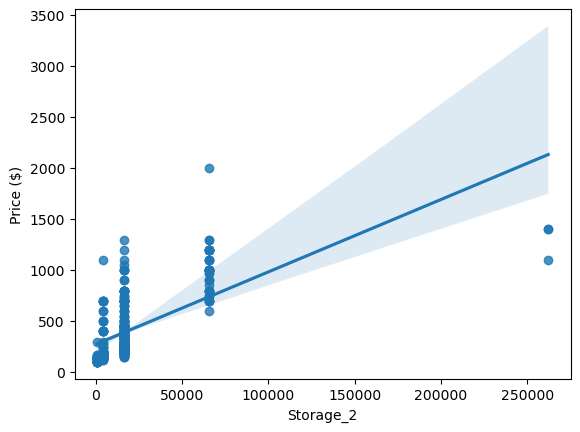

In [54]:
# Linearity
sns.regplot(df_eng,x='Storage_2',y='Price ($)');

#### Independence of Errors
Check Dubin Watson between 1.5-2.5

* we got Durbin-Watson:	2.091

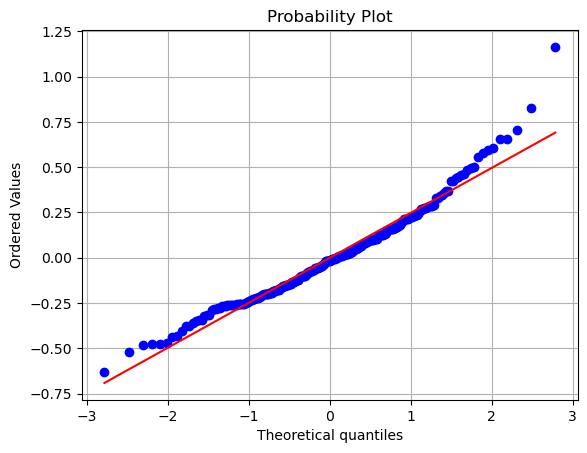

In [55]:
# Normality
# Check residuals on stats.probplot 

import scipy.stats as stats 
stats.probplot(model.resid,dist='norm',plot=plt) 
plt.grid(True); 
#range from -2 to +2 before begins to go up

In [56]:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(model.resid))  # Should be ~0 for normality
print("Kurtosis:", kurtosis(model.resid))  # ~3 for normality


Skewness: 0.8121902183194283
Kurtosis: 1.7431898230579561


In [57]:
# No Perfect multicolinarity

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
import statsmodels.api as sm 

variables = sm.OLS(y,X).exog 

pd.Series([vif(variables,i) for i in range (variables.shape[1])],index=X.columns)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


const                     78.258371
Battery Capacity (mAh)     1.482139
Storage                   17.450784
RAM                       37.215337
total_pixels               2.236831
RAM_2                     61.495326
Storage_2                 12.314090
Storage_ram               37.929454
ModelHigh_RAM                   NaN
Model_Low                  3.636347
Model_Medium               2.505518
dtype: float64

In [58]:
## IF vif > 5 then Remove highly correlated features

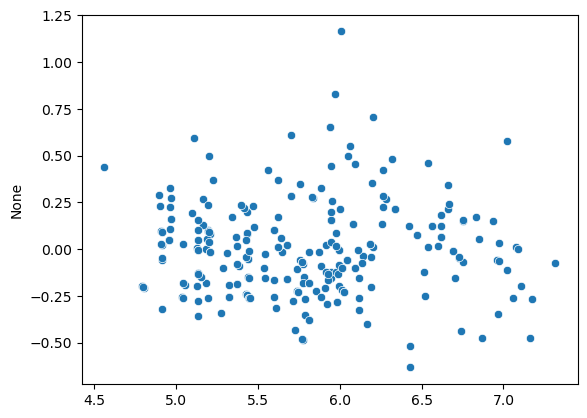

In [59]:
# Equal Variance of Errors
#Errors have a cone shape 
#Errors need to be spred even acrros the X axis 

sns.scatterplot(x=model.predict(),y=model.resid);

In [60]:

# Get the influence statistics
influence = model.get_influence()
inf_summary_df = influence.summary_frame()

# Extract Cook's D values
cooks_d_values = inf_summary_df["cooks_d"]

# Find outliers (Cook's D > 0.05)
outliers = cooks_d_values[cooks_d_values > 0.05]

# Output outliers
print("Outliers (Cook's D > 0.05):")
print(outliers)

# IF cooks_d > 0.05 check possible outliers influence and between 0.5 and 1 Warning zone still ok but still check 

Outliers (Cook's D > 0.05):
242    0.111486
112    0.065326
87     0.060752
373    0.060355
Name: cooks_d, dtype: float64


In [61]:
df.loc[242]

Model                      High
Battery Capacity (mAh)     4500
Price ($)                 549.0
Storage                     128
RAM                          12
total_pixels               74.0
Name: 242, dtype: object

In [62]:
df.drop(242,axis=0,inplace=True) 


In [63]:
df=df.reset_index()
df

,index,Model,Battery Capacity (mAh),Price ($),Storage,RAM,total_pixels
0,0,High,3095,999.0,128,6,36.0
1,1,High,5000,1199.0,256,12,140.0
2,2,Medium,4500,899.0,128,8,108.0
3,3,Medium,5020,279.0,128,6,79.0
4,4,High,4614,799.0,128,8,62.2
...,...,...,...,...,...,...,...
401,402,High,4300,1049.0,128,8,88.0
402,403,Medium,4160,349.0,128,6,60.0
403,404,High,3687,1099.0,128,6,36.0
404,405,Medium,4025,429.0,128,8,71.0


In [64]:
# RidgeCV 
# Fix Multicollinary issues if don't wanna drop any feature 

# Remember standarization 3 steps before applyitng this 

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import RidgeCV 

std= StandardScaler() 
x_tr = std.fit_transform(X.values) 
x_te = std.transform(X_test.values) 


n_alphas = 200 
alphas = 10 ** np.linspace(-3, 3, n_alphas) 

ridge_model = RidgeCV(alphas=alphas, cv=5) 

ridge_model.fit(x_tr, y) 
print(f"Cross Val R2: {ridge_model.score(x_tr, y)}") 
print(f"Cross Val MAE: {mae(np.exp(y), np.exp(ridge_model.predict(x_tr)))}") 
print(f"Alpha: {ridge_model.alpha_}") 
print('') 
print(f"Model Score: {ridge_model.score(x_te, y_test)} ") 

Cross Val R2: 0.8484468990401567
Cross Val MAE: 83.34020501794333
Alpha: 2.381685551976158

Model Score: 0.826310603472804 


# Model Interpretetion
* Cross Val R2: 0.84: Great Model Score
* Cross Val MAE: 82.73 Incorrectly prediced Prices by $82.73 in Average (I mean  not bad, wait a minute what does this actually mean men??)


### Since Incorrectly prediced Prices by $82.73 in Average This means 

if We predicted an iphone 11 price at USD 300  we need to substract USD300 -  USD82.73  and sum USD300 + USD82.73 to get the range or the most approximate price (Keep in mind this USD82.73 is average meaning this amount will not be always the same for each device but for Business purposes this is a good practice since a lot external variables can impact prices but this is better than guessing)

In [65]:
list(zip(X.columns, ridge_model.coef_)) 

[('const', 0.0),
 ('Battery Capacity (mAh)', -0.2041035251222031),
 ('Storage', 0.3005666470113323),
 ('RAM', 0.28330398743814383),
 ('total_pixels', 0.05811385704931993),
 ('RAM_2', -0.07082830444767729),
 ('Storage_2', -0.10009838320860255),
 ('Storage_ram', -0.06880611112176649),
 ('ModelHigh_RAM', 0.0),
 ('Model_Low', -0.3188925028915925),
 ('Model_Medium', -0.23236118993828045)]

## Interpreting Coefficients
#### Negative Reduces y Variable (Price ($)
  
#### Postive Increase y Variable (Price ($)

* Battery Capacity (mAh): Prices Decreases when Device has bigger Batterry (This may be caused of old Devices you run of out battery by noon)
* Storage : Prices increases if Devices have more storages makes sence
* RAM: Prices increases if Devices have more Ram also Makes sense
* total_pixels: Prices increases if Devices have Better resolutions (more pixels)
  

# Predictions

In [66]:
# Get predicted prices
predictions = model.predict(X_test)

# Compare predictions with actual values
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': predictions
})

comparison_df

,Actual Price,Predicted Price
159,5.187386,5.366586
355,6.212606,6.182897
158,5.733341,5.954329
277,4.934474,5.319212
153,5.517453,5.599103
...,...,...
56,5.293305,5.197972
16,6.683361,6.693382
94,5.855072,6.092104
143,5.631212,5.922190


In [67]:
# Calculate the range of predictions
lower_bound = predictions - 82.73
upper_bound = predictions + 82.73

# Add the range to the DataFrame
comparison_df['Lower Bound'] = lower_bound
comparison_df['Upper Bound'] = upper_bound

comparison_df


,Actual Price,Predicted Price,Lower Bound,Upper Bound
159,5.187386,5.366586,-77.363414,88.096586
355,6.212606,6.182897,-76.547103,88.912897
158,5.733341,5.954329,-76.775671,88.684329
277,4.934474,5.319212,-77.410788,88.049212
153,5.517453,5.599103,-77.130897,88.329103
...,...,...,...,...
56,5.293305,5.197972,-77.532028,87.927972
16,6.683361,6.693382,-76.036618,89.423382
94,5.855072,6.092104,-76.637896,88.822104
143,5.631212,5.922190,-76.807810,88.652190


In [68]:
# ElasticNet CV 

# Great when desperate and need to try something else 
# Cross validation loop finds best alpha and lambda 
# Remember standarization 3 steps before applyitng this 

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import ElasticNetCV 

std= StandardScaler() 
x_tr = std.fit_transform(X.values) 
x_te = std.transform(X_test.values) 


alphas = 10 ** np.linspace(-3, 3, 200) 
l1_ratios = np.linspace(.01, 1, 10) #.9,1,10 

# Increase the max_iter parameter 
enet_model = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, max_iter=10000) # Increase max_iter here 

enet_model.fit(x_tr, y) 

print(f"Cross Val R2: {enet_model.score(x_tr, y)}") 
print(f"Cross Val MAE: {mae(np.exp(y), np.exp(enet_model.predict(x_tr)))}") 
print(f"Alpha: {enet_model.alpha_}") 
print(f"L1_Ratio: {enet_model.l1_ratio_}")

Cross Val R2: 0.8482717178024599
Cross Val MAE: 83.413830306678
Alpha: 0.008603464416684501
L1_Ratio: 0.01


In [69]:
# Get predicted prices
predictions = enet_model.predict(X_test)

# Compare predictions with actual values
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': predictions
})

comparison_df

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(


,Actual Price,Predicted Price
159,5.187386,-2608.083570
355,6.212606,-987.199705
158,5.733341,-2641.624024
277,4.934474,-1254.855207
153,5.517453,-2624.233901
...,...,...
56,5.293305,-2809.707753
16,6.683361,-2436.597816
94,5.855072,-2501.759195
143,5.631212,-2642.739945


In [70]:
# Calculate the range of predictions
lower_bound = predictions - 83.41
upper_bound = predictions + 83.41

# Add the range to the DataFrame
comparison_df['Lower Bound'] = lower_bound
comparison_df['Upper Bound'] = upper_bound

comparison_df

,Actual Price,Predicted Price,Lower Bound,Upper Bound
159,5.187386,-2608.083570,-2691.493570,-2524.673570
355,6.212606,-987.199705,-1070.609705,-903.789705
158,5.733341,-2641.624024,-2725.034024,-2558.214024
277,4.934474,-1254.855207,-1338.265207,-1171.445207
153,5.517453,-2624.233901,-2707.643901,-2540.823901
...,...,...,...,...
56,5.293305,-2809.707753,-2893.117753,-2726.297753
16,6.683361,-2436.597816,-2520.007816,-2353.187816
94,5.855072,-2501.759195,-2585.169195,-2418.349195
143,5.631212,-2642.739945,-2726.149945,-2559.329945


## Final Thoughts

RidgeCV got a MAE lowe thank ElasticNetCV so I will stick with RidgeCV we can keep improving model with a more powerful alghorithm but since this is the fisrt ML model for the Company we will focus more on explaining the value of Predictions Since that was the Main Goal here

## Final Tip: For 99.9% of the time (Most of the time just making emphasis  here) for Predicitons finding the MAE is key sinc we can create an excel spredsheet and just + or - the Price we want to predict to ge the AVG Price range just like magic